# 📊 SMOTE and SMOTETomek: Handling Imbalanced Datasets

## 🎯 Definition

### What is SMOTE?
**SMOTE (Synthetic Minority Over-sampling Technique)** is a powerful technique used in machine learning to address imbalanced datasets where the minority class has significantly fewer instances than the majority class. 

#### Key Characteristics:
- **Purpose**: Balance class distribution by creating synthetic samples
- **Method**: Generates artificial data points by interpolating between existing minority class instances
- **Approach**: Uses k-nearest neighbors to create new synthetic examples

### What is SMOTETomek?
**SMOTETomek** is a hybrid resampling technique that combines:
1. **SMOTE**: Over-sampling of the minority class
2. **Tomek Links**: Under-sampling by removing noisy and borderline examples

This combination provides cleaner decision boundaries and better class separation.

---

## 📝 Step 1: Import Required Libraries

We'll start by importing the necessary library to create our imbalanced dataset.

In [1]:
from sklearn.datasets import make_classification

## 📝 Step 2: Create an Imbalanced Dataset

Creating a synthetic imbalanced dataset with:
- **1000 samples** total
- **90% majority class** (900 samples)
- **10% minority class** (100 samples)
- **2 features** for easy visualization

In [2]:
X,y=make_classification(n_samples=1000,n_redundant=0,n_features=2,n_clusters_per_class=1,
                   weights=[0.90],random_state=12)

## 📝 Step 3: Prepare the DataFrame

Converting arrays to a pandas DataFrame for easier manipulation and analysis.

In [3]:
import pandas as pd
df1=pd.DataFrame(X,columns=['f1','f2'])
df2=pd.DataFrame(y,columns=['target'])
final_df=pd.concat([df1,df2],axis=1)
final_df.head()

,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0


## 🔍 Observation: Original Class Distribution

Let's examine the class imbalance in our original dataset.

In [4]:
from collections import Counter
print("Before :", Counter(y))

Before : Counter({0: 900, 1: 100})


## 📈 Visualization: Original Imbalanced Dataset

Visualizing the distribution of classes before applying any resampling technique.

**Expected Result**: Clear imbalance with far more points of one class than the other.

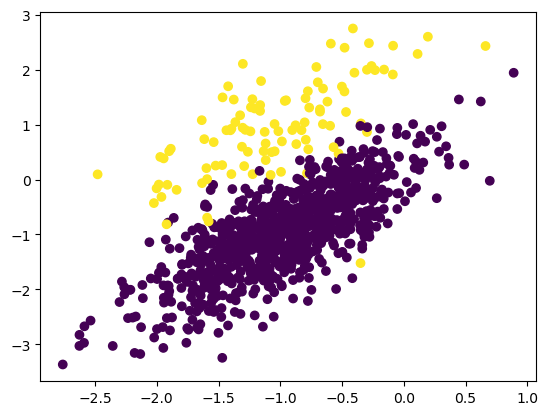

In [5]:
import matplotlib.pyplot as plt
plt.scatter(final_df['f1'],final_df['f2'],c=final_df['target'])
plt.show()

## 📦 Step 4: Install Required Packages (if needed)

Uncomment and run the cell below if you need to install or upgrade the required libraries.

In [6]:
# pip install --upgrade scikit-learn imbalanced-learn

## 🔧 Step 5: Apply SMOTETomek Technique

### How SMOTETomek Works:
1. **Over-sampling with SMOTE**: Creates synthetic minority samples
2. **Cleaning with Tomek Links**: Removes overlapping samples at class boundaries
3. **Result**: Balanced dataset with cleaner decision boundaries

### Parameters:
- `random_state=42`: For reproducibility
- `n_jobs=-1`: Uses all CPU cores for faster processing

In [7]:
from imblearn.combine import SMOTETomek
smote_tomek = SMOTETomek(random_state=42, n_jobs = -1)
X_st, y_st = smote_tomek.fit_resample(X, y)
print("AFTER :", Counter(y_st))

AFTER : Counter({0: 886, 1: 886})


## 📝 Step 6: Prepare SMOTETomek DataFrame

Converting the resampled data back to DataFrame format for visualization.

In [8]:
df1=pd.DataFrame(X_st,columns=['f1','f2'])
df2=pd.DataFrame(y_st,columns=['target'])
st_df=pd.concat([df1,df2],axis=1)

## 📈 Result: SMOTETomek Balanced Dataset

### 🎯 Key Observations:
- **Balanced classes**: Both classes now have equal representation
- **Cleaner boundaries**: Tomek links remove overlapping samples
- **Better separation**: Classes are more clearly distinguished

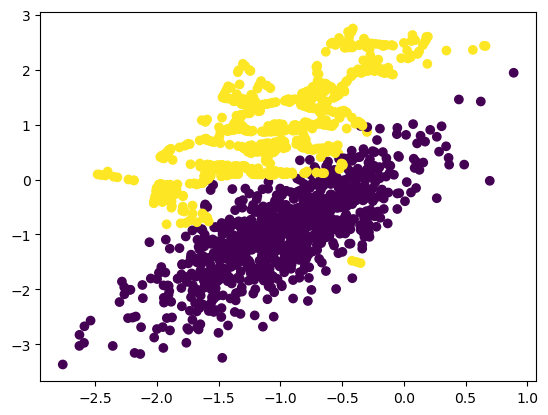

In [9]:
plt.scatter(st_df['f1'],st_df['f2'], c = st_df['target'])
plt.show()

---

## 🔬 Comparison: SMOTE (Without Tomek Links)

### Purpose of This Section:
Let's compare SMOTETomek with pure SMOTE to understand the advantage of adding Tomek link cleaning.

## 🔧 Step 7: Apply SMOTE Only

Applying only SMOTE without the Tomek link cleaning step.

In [10]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_s, y_s = smote.fit_resample(X, y)
print("After :", Counter(y_s))

After : Counter({0: 900, 1: 900})


## 📝 Step 8: Prepare SMOTE DataFrame

Converting the SMOTE-only resampled data to DataFrame.

In [11]:
df1=pd.DataFrame(X_s,columns=['f1','f2'])
df2=pd.DataFrame(y_s,columns=['target'])
s_df=pd.concat([df1,df2],axis=1)

## 📈 Result: SMOTE-Only Dataset

### 🔍 Compare with SMOTETomek:
- SMOTE creates more samples (may include some borderline cases)
- SMOTETomek has cleaner boundaries due to Tomek link removal

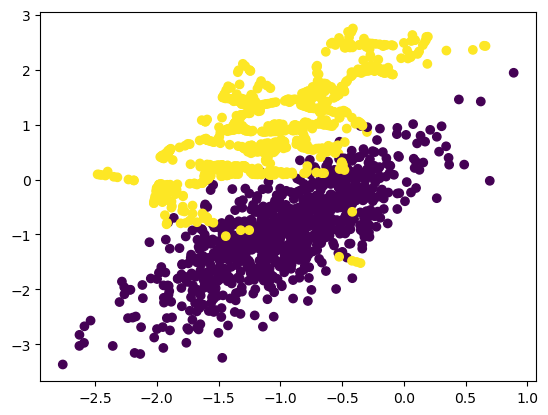

In [12]:
plt.scatter(s_df['f1'],s_df['f2'], c = s_df['target'])
plt.show()

---

## 📊 Final Observations & Conclusions

### ✅ Key Findings:

#### 1. **Original Dataset**
- Severe class imbalance (90% vs 10%)
- Difficult for ML models to learn minority class patterns
- Risk of biased predictions toward majority class

#### 2. **SMOTE Results**
- ✅ Balanced class distribution
- ✅ Synthetic samples created through interpolation
- ⚠️ May include some overlapping/noisy samples at boundaries

#### 3. **SMOTETomek Results**
- ✅ Balanced class distribution
- ✅ Cleaner decision boundaries
- ✅ Removed Tomek links (borderline ambiguous samples)
- ✅ Better class separation

### 🎯 When to Use Each Technique:

| Technique | Best For | Advantages |
|-----------|----------|------------|
| **SMOTE** | General imbalanced data | Simple, effective, fast |
| **SMOTETomek** | Noisy data with overlap | Cleaner boundaries, better separation |

### 💡 Practical Recommendations:

1. **Start with SMOTE** for quick balancing
2. **Use SMOTETomek** when you notice:
   - High misclassification at boundaries
   - Noisy or overlapping data
   - Need for cleaner decision boundaries

3. **Always compare** model performance with:
   - Original imbalanced data
   - SMOTE-balanced data
   - SMOTETomek-balanced data

### 📌 Important Notes:

⚠️ **Remember**: 
- Apply resampling only on **training data**, not on test data
- Evaluate model performance using proper metrics (F1-score, Precision, Recall, AUC-ROC)
- Cross-validation should be done carefully with imbalanced data

---

### 🚀 Next Steps:
- Train classifiers on both balanced datasets
- Compare model performance
- Fine-tune hyperparameters
- Validate on test data